In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#read raw data
df = pd.read_csv('(raw) Weekly_data.csv')
df.head()

,week,future_return,volume,inventory,amount,BASIS,index_turnover_rate,short_balance_ratio,pli,t_spread,RSI,index_trading_volume,CCt+1
0,1,NaN,10.976047,8.185907,10.976047,59.2680,0.440,0.000005,0.00,2.04740,0.000000,6.510794,0.0
1,2,-0.056701,13.400486,10.345831,13.400486,31.7160,0.658,0.000010,0.20,2.01880,52.442353,8.499683,0.0
2,3,-0.028819,13.474156,10.799555,13.474156,34.6024,0.490,0.000027,0.20,1.97462,18.350791,8.218636,0.0
3,4,-0.042739,13.527370,10.820138,13.527370,57.0780,0.500,0.000028,0.25,1.94245,17.038370,7.993090,0.0
4,5,-0.048364,14.049264,11.179381,14.049264,16.1712,0.468,0.000056,0.60,1.89940,48.441850,8.089973,0.0


In [19]:
#check nan value in data
df.isnull().sum()


week                    0
future_return           1
volume                  0
inventory               0
amount                  0
BASIS                   0
index_turnover_rate     0
short_balance_ratio     0
pli                     0
t_spread                0
RSI                     0
index_trading_volume    0
CCt+1                   1
dtype: int64

In [20]:
#data cleaning
df = df.dropna()
df.isnull().sum()


week                    0
future_return           0
volume                  0
inventory               0
amount                  0
BASIS                   0
index_turnover_rate     0
short_balance_ratio     0
pli                     0
t_spread                0
RSI                     0
index_trading_volume    0
CCt+1                   0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 1 to 650
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   week                  650 non-null    int64  
 1   future_return         650 non-null    float64
 2   volume                650 non-null    float64
 3   inventory             650 non-null    float64
 4   amount                650 non-null    float64
 5   BASIS                 650 non-null    float64
 6   index_turnover_rate   650 non-null    float64
 7   short_balance_ratio   650 non-null    float64
 8   pli                   650 non-null    float64
 9   t_spread              650 non-null    float64
 10  RSI                   650 non-null    float64
 11  index_trading_volume  650 non-null    float64
 12  CCt+1                 650 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 71.1 KB


In [22]:
#count how many CCt+1 == 0
df[df['CCt+1'] == 0].count()


week                    623
future_return           623
volume                  623
inventory               623
amount                  623
BASIS                   623
index_turnover_rate     623
short_balance_ratio     623
pli                     623
t_spread                623
RSI                     623
index_trading_volume    623
CCt+1                   623
dtype: int64

In [23]:
df[df['CCt+1'] == 1].count()


week                    27
future_return           27
volume                  27
inventory               27
amount                  27
BASIS                   27
index_turnover_rate     27
short_balance_ratio     27
pli                     27
t_spread                27
RSI                     27
index_trading_volume    27
CCt+1                   27
dtype: int64

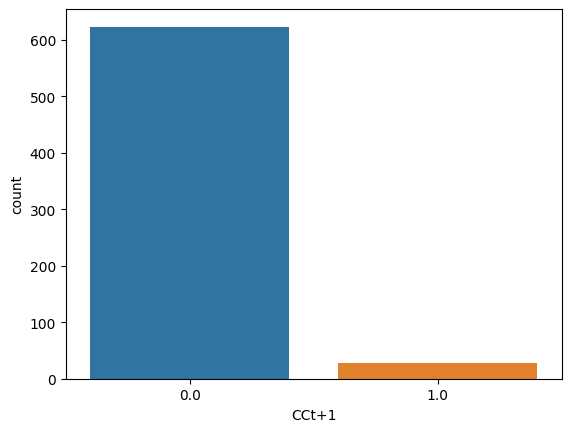

In [24]:
#plot CCt+1 count plot with number on the bin top
sns.countplot(x="CCt+1", data=df)
plt.show()


In [49]:
print('Percent of fraud transaction: ',len(df[df['CCt+1']==1])/len(df['CCt+1'])*100,"%")

Percent of fraud transaction:  4.153846153846154 %


array([[<AxesSubplot:title={'center':'future_return'}>,
        <AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'inventory'}>],
       [<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'BASIS'}>,
        <AxesSubplot:title={'center':'index_turnover_rate'}>],
       [<AxesSubplot:title={'center':'short_balance_ratio'}>,
        <AxesSubplot:title={'center':'pli'}>,
        <AxesSubplot:title={'center':'t_spread'}>],
       [<AxesSubplot:title={'center':'RSI'}>,
        <AxesSubplot:title={'center':'index_trading_volume'}>,
        <AxesSubplot:title={'center':'CCt+1'}>]], dtype=object)

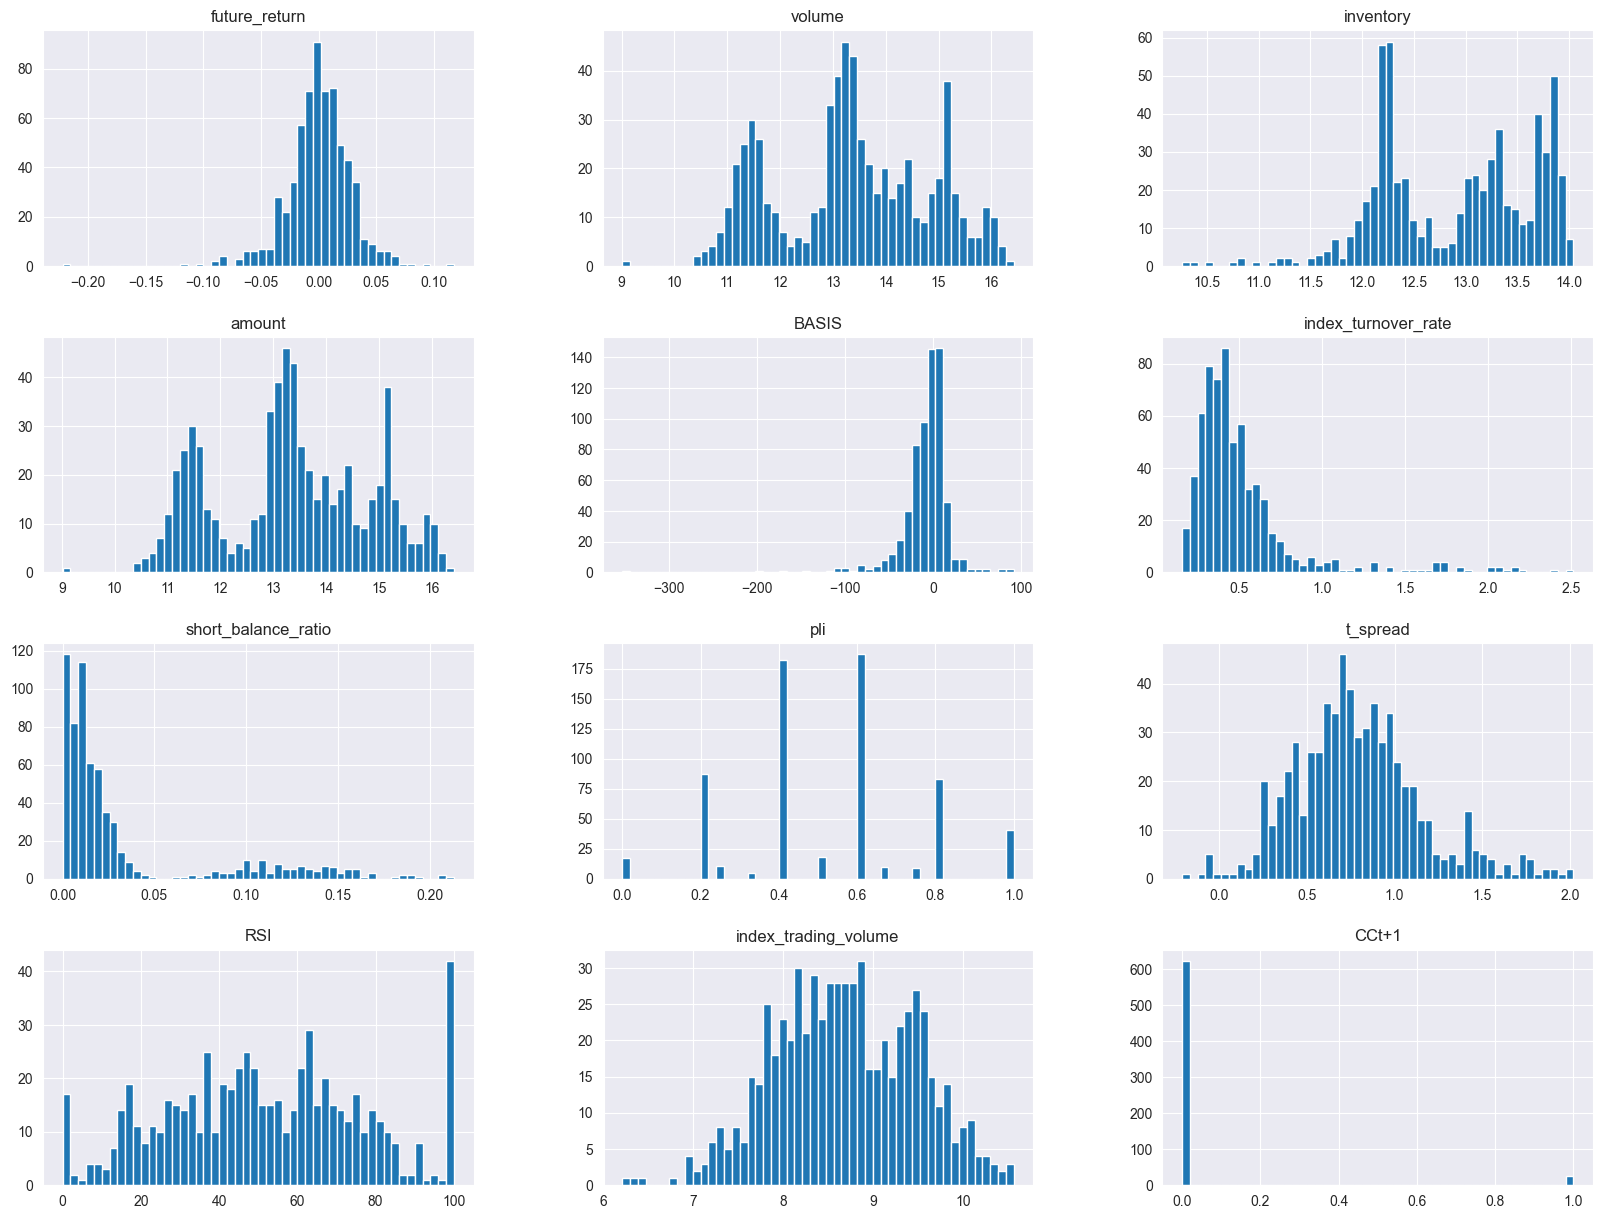

In [54]:
#univariate analysis for all features in a square without week
df.drop(['week'], axis=1).hist(bins=50, figsize=(20,15))

In [55]:
#more univariate analysis for all features without week
df.drop(['week'], axis=1).describe() # 

,future_return,volume,inventory,amount,BASIS,index_turnover_rate,short_balance_ratio,pli,t_spread,RSI,index_trading_volume,CCt+1
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.000189,13.355326,12.895558,13.355326,-8.536464,0.516347,0.033786,0.517897,0.790192,51.482090,8.686841,0.041538
std,0.027966,1.443125,0.738721,1.443125,28.824115,0.342854,0.047067,0.232055,0.362369,25.211772,0.777013,0.199686
min,-0.222283,9.014325,10.256782,9.014325,-353.150333,0.158000,0.000010,0.000000,-0.210760,0.000000,6.206515,0.000000
25%,-0.012952,12.147537,12.247115,12.147537,-17.731825,0.328000,0.006621,0.400000,0.558195,33.120255,8.135211,0.000000
50%,0.001069,13.333479,13.021572,13.333479,-3.393170,0.424000,0.013465,0.600000,0.748075,50.200947,8.663530,0.000000
75%,0.015969,14.401888,13.598041,14.401888,5.042900,0.563500,0.028236,0.600000,0.982415,69.111737,9.302325,0.000000
max,0.117596,16.422424,14.043919,16.422424,91.457600,2.512000,0.213129,1.000000,2.018800,100.000000,10.568039,1.000000


c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


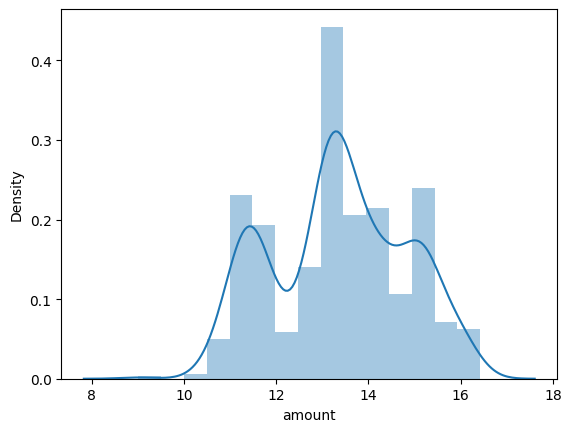

c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


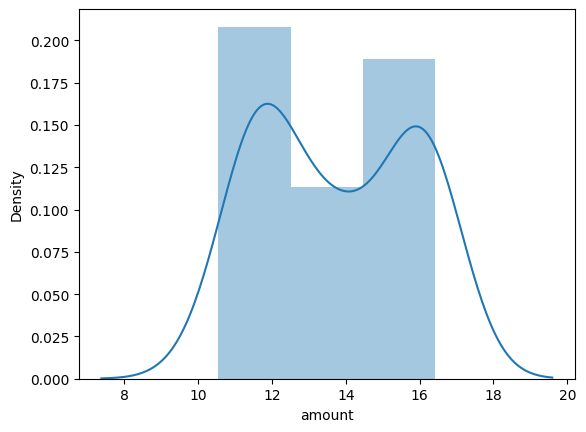

In [26]:
sns.distplot(df.amount)
plt.show()
sns.distplot(df[df['CCt+1'] ==1].amount)
plt.show()

c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


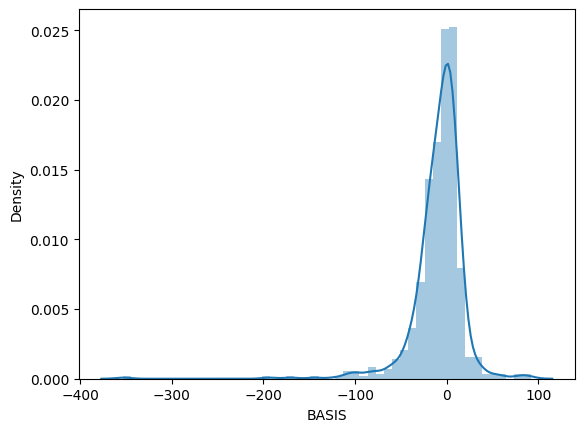

c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


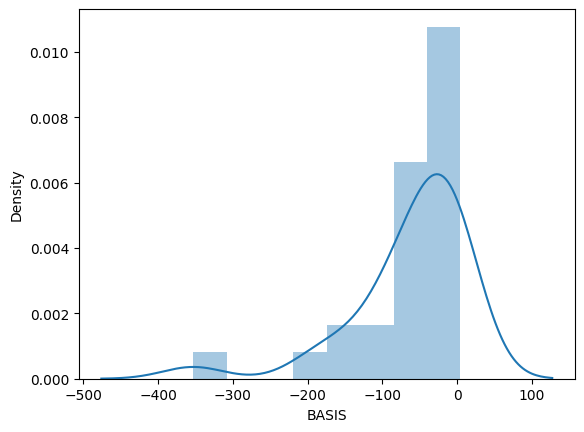

In [27]:
sns.distplot(df.BASIS)
plt.show()
sns.distplot(df[df['CCt+1'] ==1].BASIS)
plt.show()

In [28]:
#check which variables are significant
df.corr()
# the higher the corr value, the more significant the variable is
# the corr value of 1 means the two variables are perfectly correlated
# the corr value of -1 means the two variables are perfectly negatively correlated
# the corr value of 0 means the two variables are not correlated


,week,future_return,volume,inventory,amount,BASIS,index_turnover_rate,short_balance_ratio,pli,t_spread,RSI,index_trading_volume,CCt+1
week,1.000000,0.015036,-0.415061,0.538153,-0.415061,-0.220621,0.032815,0.703814,0.006619,-0.159993,-0.002216,0.639031,0.024100
future_return,0.015036,1.000000,-0.012692,0.054107,-0.012692,0.227153,0.170354,-0.024330,0.398369,-0.108301,0.492866,0.115780,-0.215538
volume,-0.415061,-0.012692,1.000000,0.473651,1.000000,0.218941,0.331441,-0.047523,-0.026549,0.202639,0.010148,-0.043312,0.056975
inventory,0.538153,0.054107,0.473651,1.000000,0.473651,0.024981,0.280085,0.586499,-0.017896,-0.089292,-0.000709,0.551561,-0.037616
amount,-0.415061,-0.012692,1.000000,0.473651,1.000000,0.218941,0.331441,-0.047523,-0.026549,0.202639,0.010148,-0.043312,0.056975
BASIS,-0.220621,0.227153,0.218941,0.024981,0.218941,1.000000,-0.101164,-0.026331,-0.005329,0.037715,0.088384,-0.210369,-0.391658
index_turnover_rate,0.032815,0.170354,0.331441,0.280085,0.331441,-0.101164,1.000000,-0.033387,0.171321,0.093789,0.134915,0.669507,0.240097
short_balance_ratio,0.703814,-0.024330,-0.047523,0.586499,-0.047523,-0.026331,-0.033387,1.000000,-0.029863,0.006016,-0.051214,0.450327,-0.068591
pli,0.006619,0.398369,-0.026549,-0.017896,-0.026549,-0.005329,0.171321,-0.029863,1.000000,-0.077861,0.476347,0.102890,-0.070380
t_spread,-0.159993,-0.108301,0.202639,-0.089292,0.202639,0.037715,0.093789,0.006016,-0.077861,1.000000,-0.066306,-0.009084,0.082844


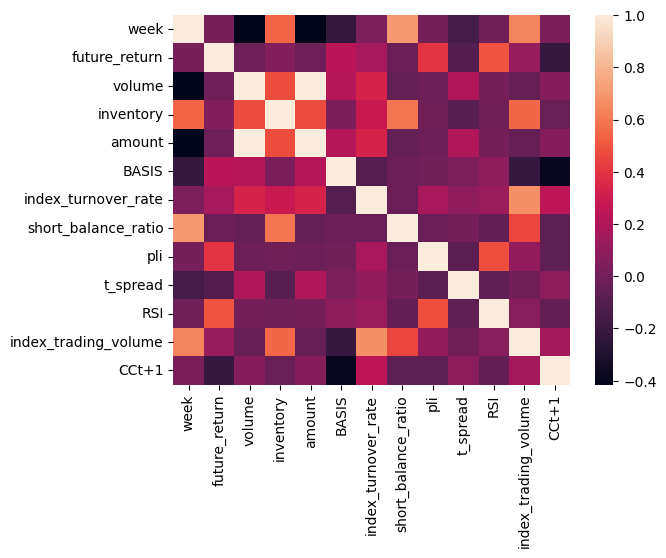

In [29]:
#plot the correlation matrix

corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

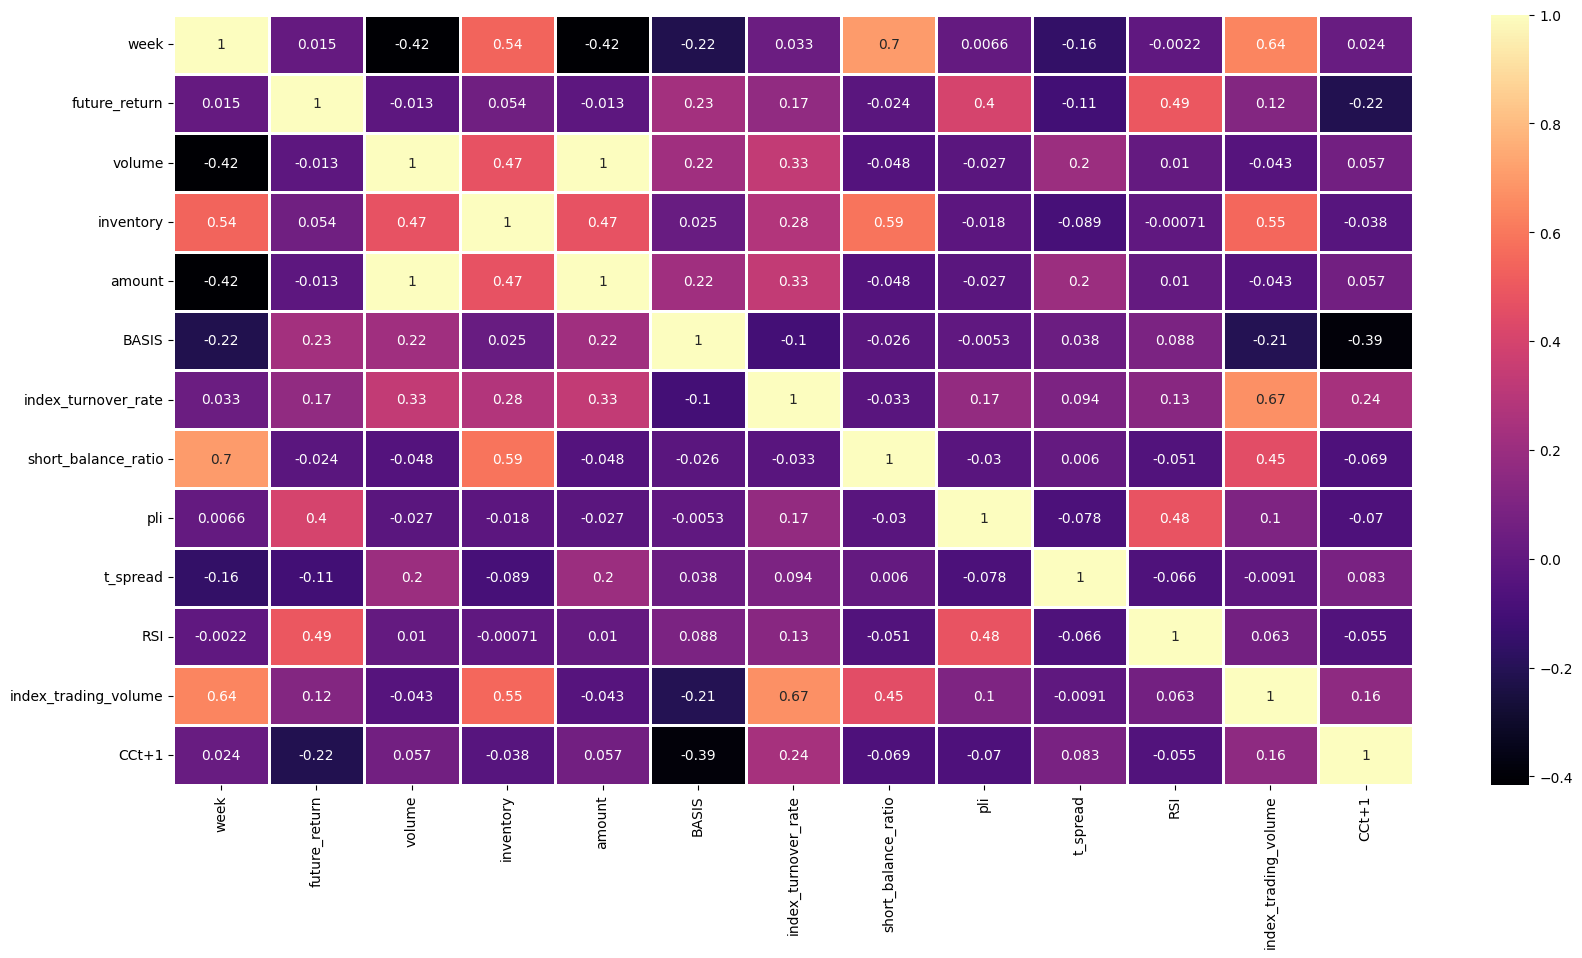

In [30]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

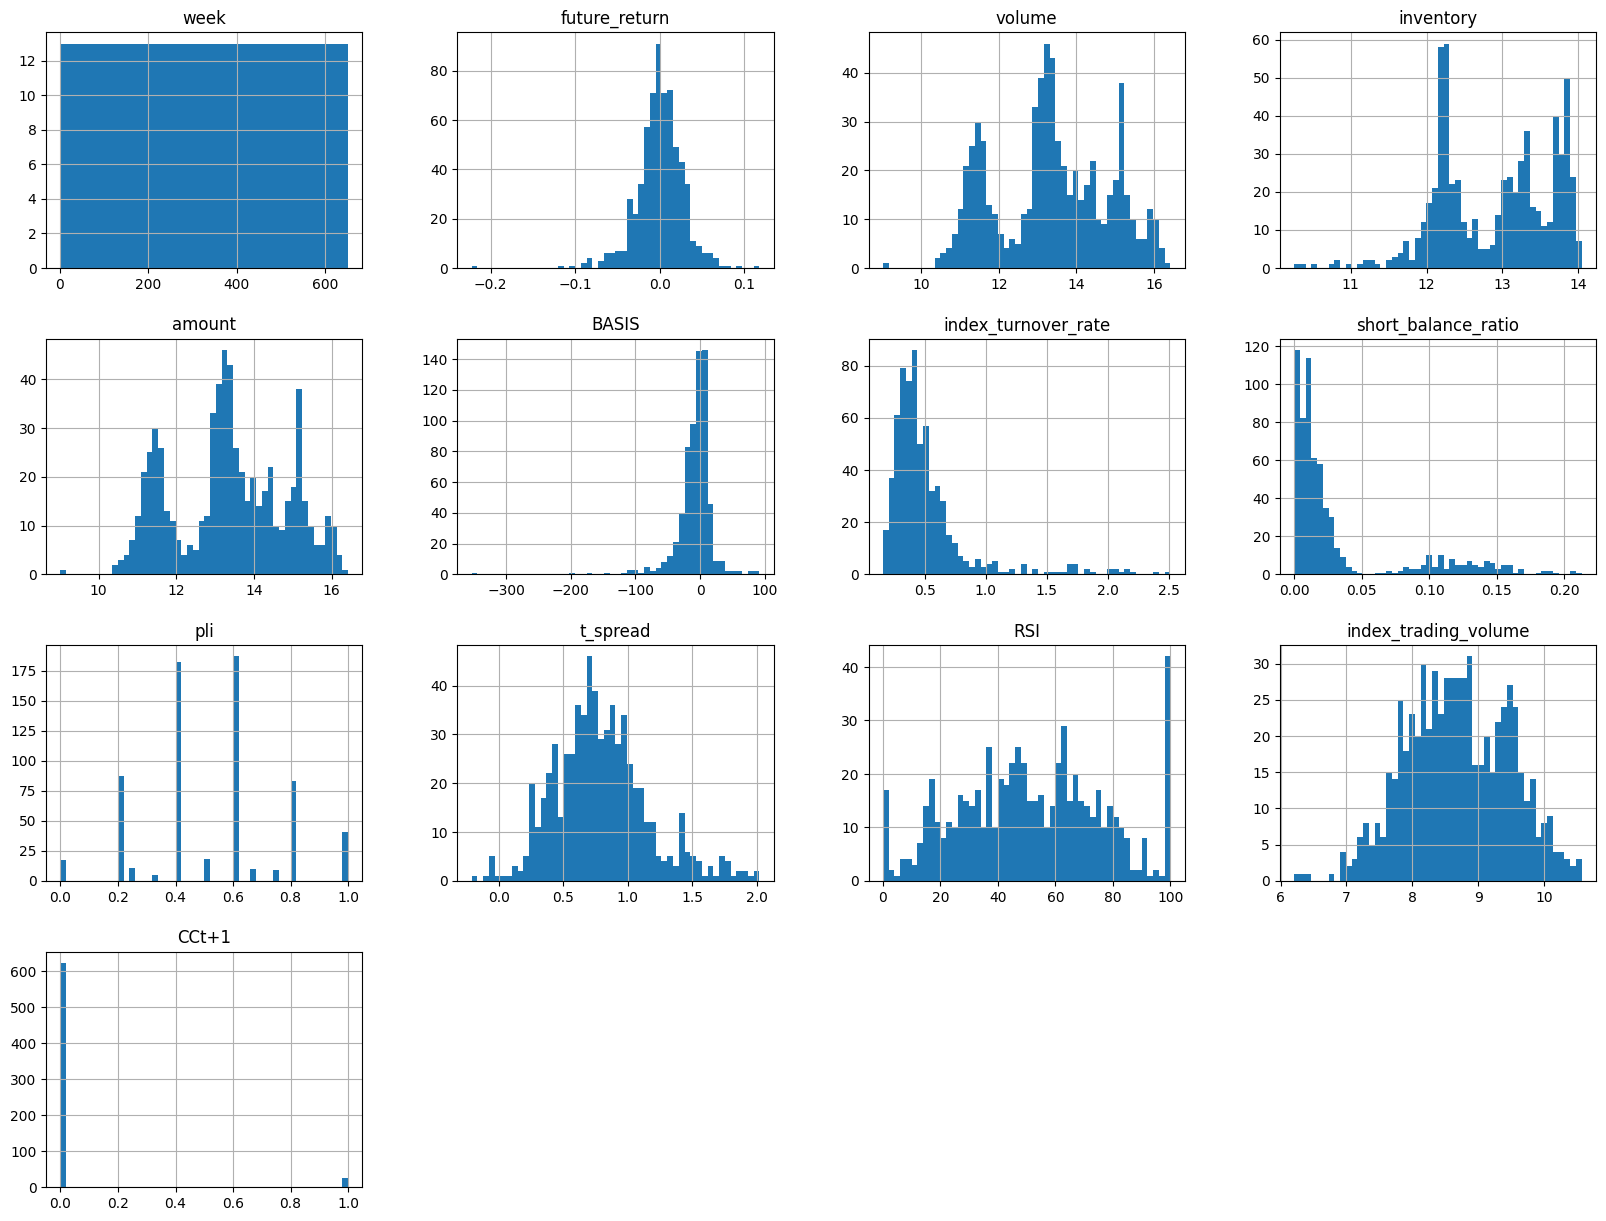

In [31]:
#EDA
#check the distribution of each variable

df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='volume', ylabel='BASIS'>

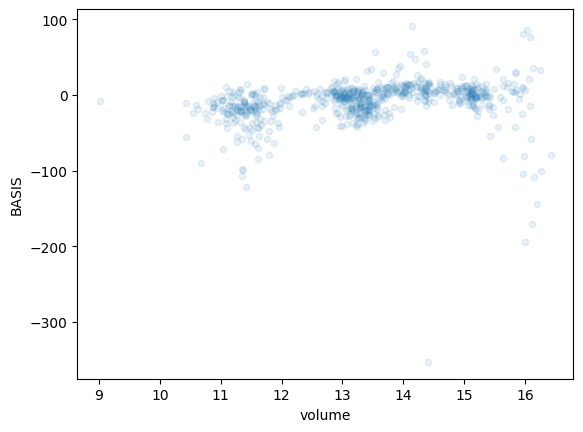

In [32]:
#multivariate analysis
#check the relationship between each variable and weekly sales
#scatter plot
df.plot(kind="scatter", x="volume", y="BASIS", alpha=0.1)
#how to read scatter plot
#the x axis is the volume, the y axis is the basis
#the alpha value is the transparency of the dots
#the darker the dots, the more dots there are
#the more dots there are, the more data points there are
#the more data points there are, the more significant the relationship is


<AxesSubplot:xlabel='volume', ylabel='amount'>

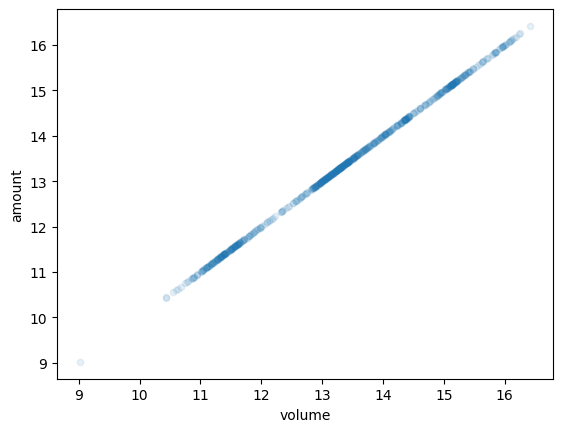

In [33]:
df.plot(kind="scatter", x="volume", y="amount", alpha=0.1)

<AxesSubplot:xlabel='short_balance_ratio', ylabel='inventory'>

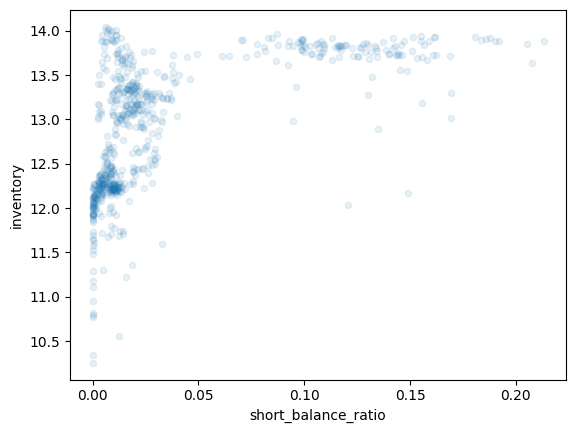

In [34]:
df.plot(kind="scatter", x="short_balance_ratio", y="inventory", alpha=0.1)

<AxesSubplot:xlabel='index_turnover_rate', ylabel='index_trading_volume'>

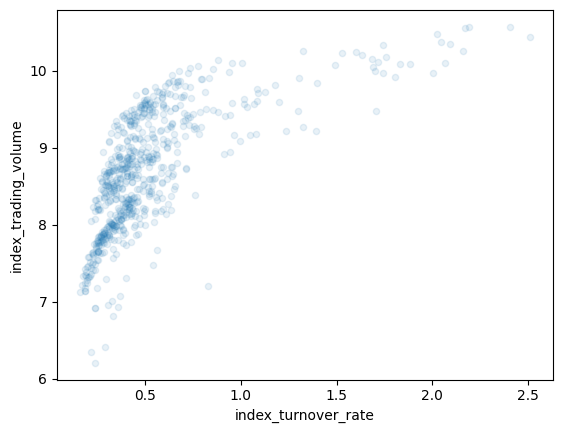

In [35]:

df.plot(kind="scatter", x="index_turnover_rate", y="index_trading_volume", alpha=0.1)

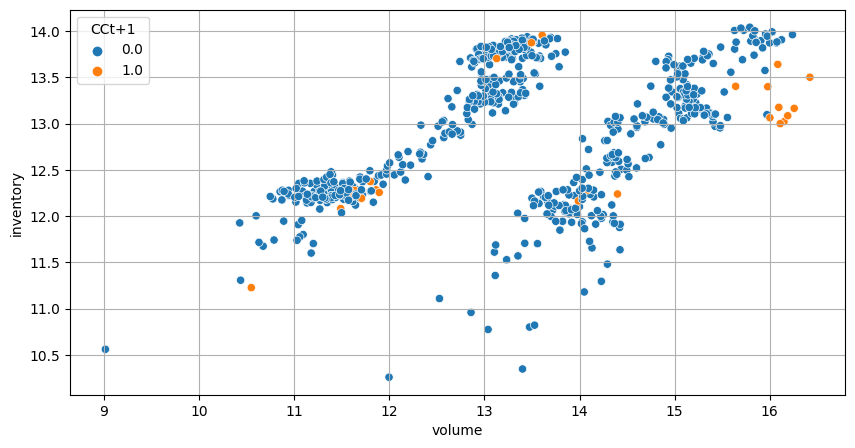

In [36]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="volume", y="inventory",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()


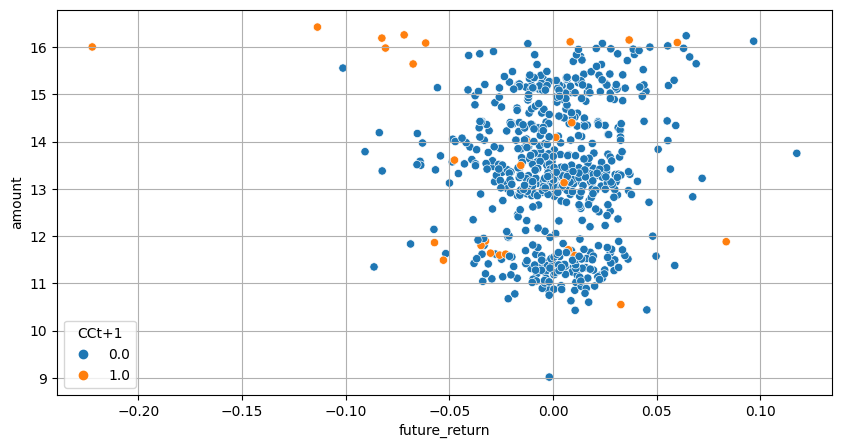

In [37]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="future_return", y="amount",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()


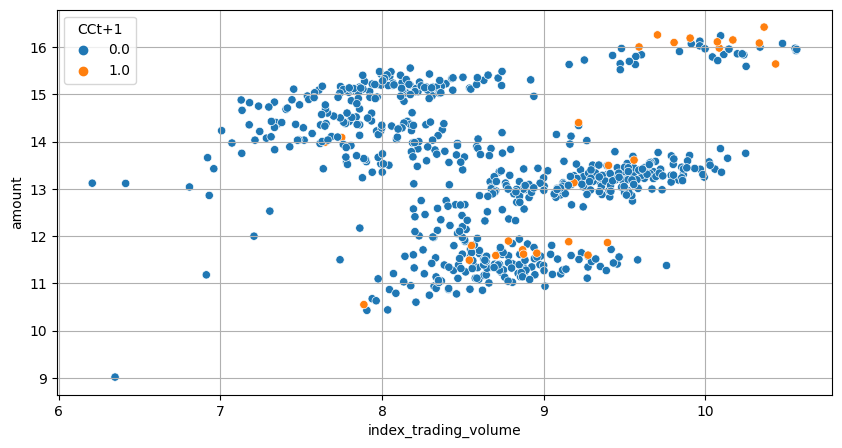

In [38]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="index_trading_volume", y="amount",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()

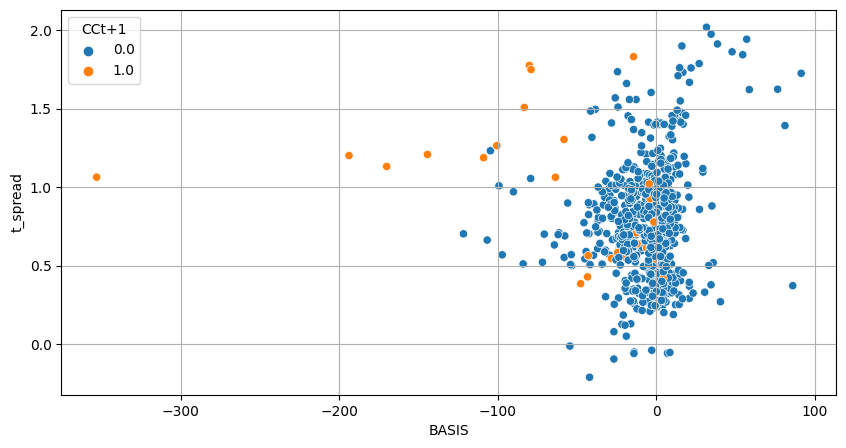

In [39]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="BASIS", y="t_spread",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()

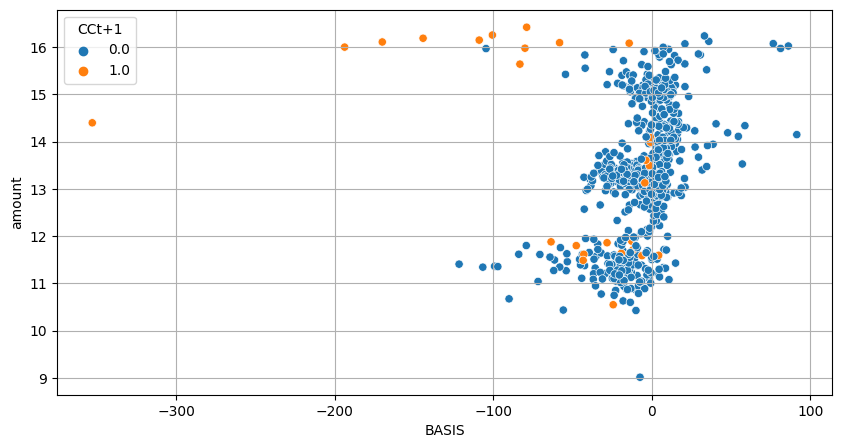

In [40]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="BASIS", y="amount",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()

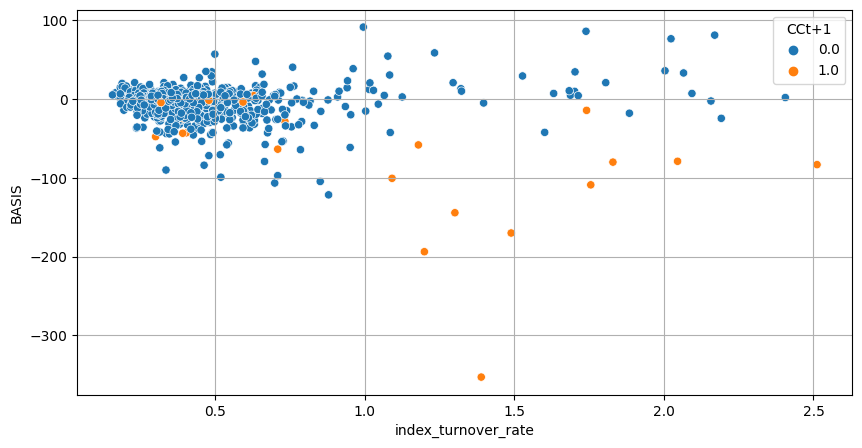

In [41]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="index_turnover_rate", y="BASIS",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()

In [42]:
df.pivot_table(df, index=["CCt+1"],  aggfunc='mean')

,BASIS,RSI,amount,future_return,index_trading_volume,index_turnover_rate,inventory,pli,short_balance_ratio,t_spread,volume,week
CCt+1,,,,,,,,,,,,
0.0,-6.188096,51.772723,13.338222,0.001443,8.661614,0.499223,12.901339,0.521295,0.034457,0.783947,13.338222,325.558587
1.0,-62.722872,44.776015,13.749981,-0.028744,9.268927,0.911463,12.762183,0.439506,0.018290,0.934284,13.749981,348.222222


c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  if __name__ == "__main__":
c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  from ipykernel import kernelapp as app
c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  if __name__ == "__main__":
c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will becom

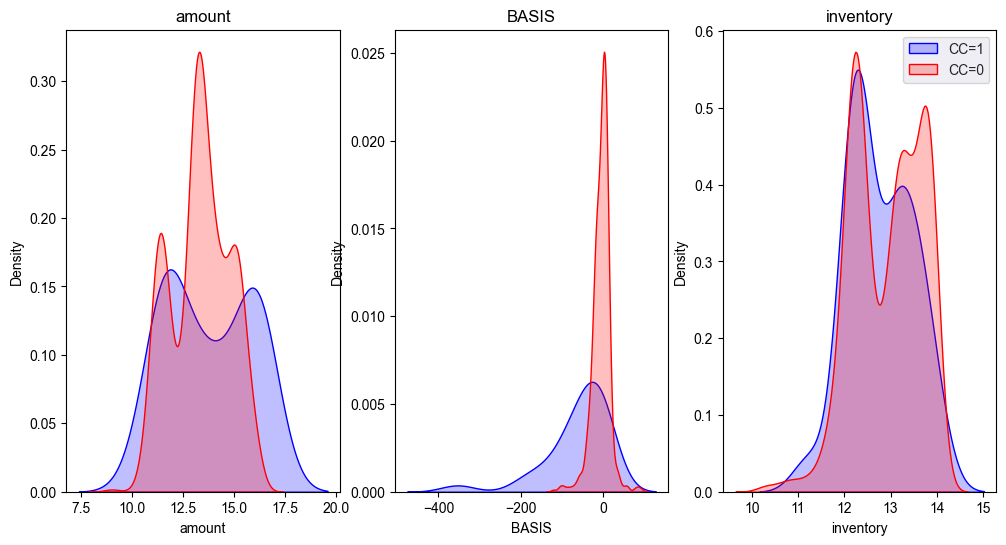

In [43]:
fig, axes = plt.subplots(1,3,figsize=(12,6))
check_cols = ["amount", "BASIS","inventory"]
sns.set_style("dark")
for i in range(len(check_cols)):
    sns.kdeplot(data=df.loc[df["CCt+1"] == 1, check_cols[i]],
                  ax=axes[i],
                  label="CC=1",
                  color='blue',
                  shade=True).set(title=check_cols[i])

    sns.kdeplot(data=df.loc[df["CCt+1"] == 0, check_cols[i]],
                  ax=axes[i],
                  label="CC=0",
                  color='red',
                  shade=True)
#legend
plt.legend()

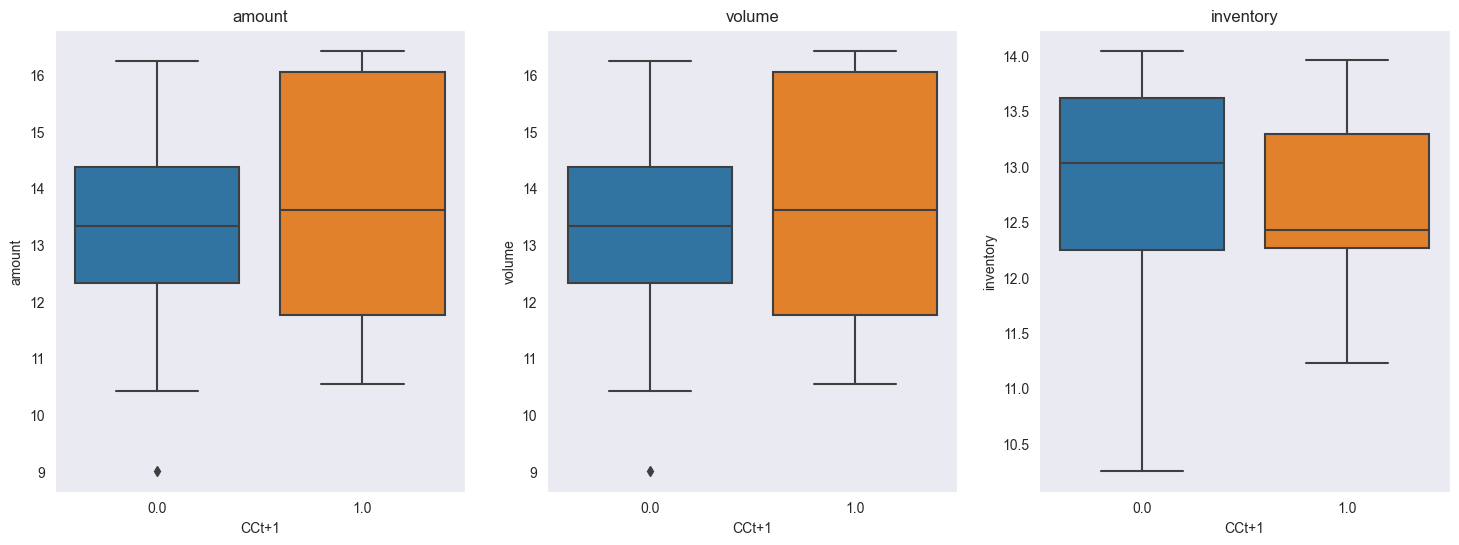

In [44]:
fig, axes = plt.subplots(1,3,figsize=(18,6)) 
check_cols = ["amount", "volume", "inventory"]
for i in range(len(check_cols)):
    sns.boxplot(x='CCt+1', y= check_cols[i], data=df,ax=axes[i]).set(title=check_cols[i])

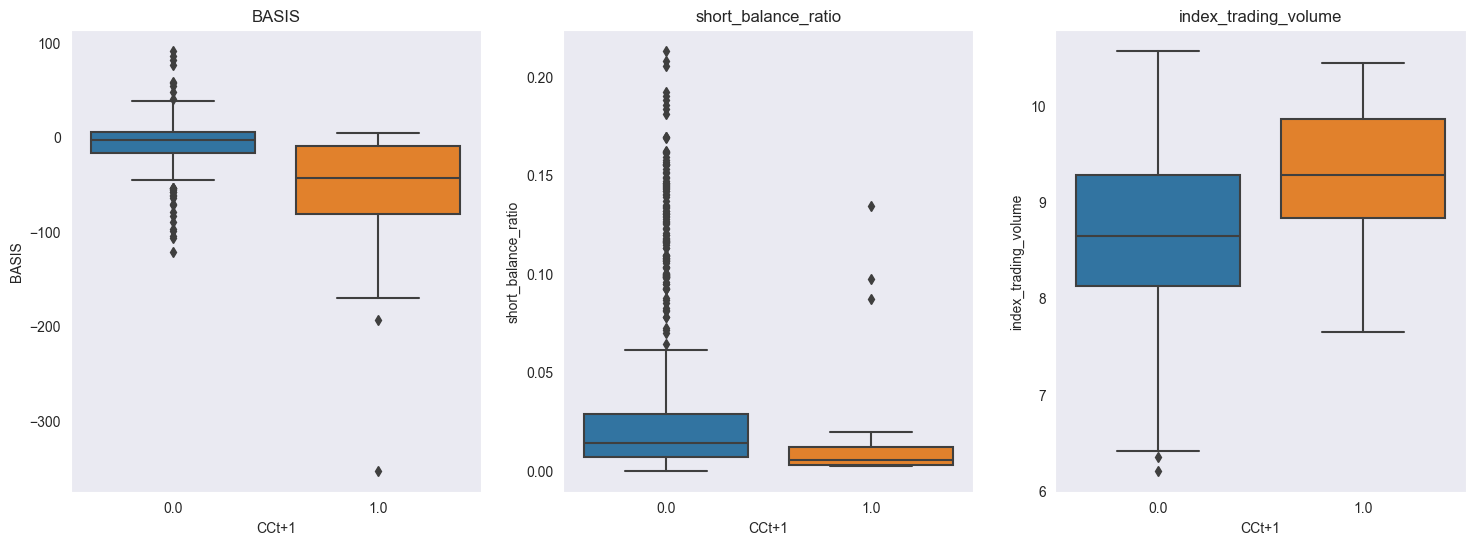

In [45]:
fig, axes = plt.subplots(1,3,figsize=(18,6)) 
check_cols = ["BASIS", "short_balance_ratio", "index_trading_volume"]
for i in range(len(check_cols)):
    sns.boxplot(x='CCt+1', y= check_cols[i], data=df,ax=axes[i]).set(title=check_cols[i])

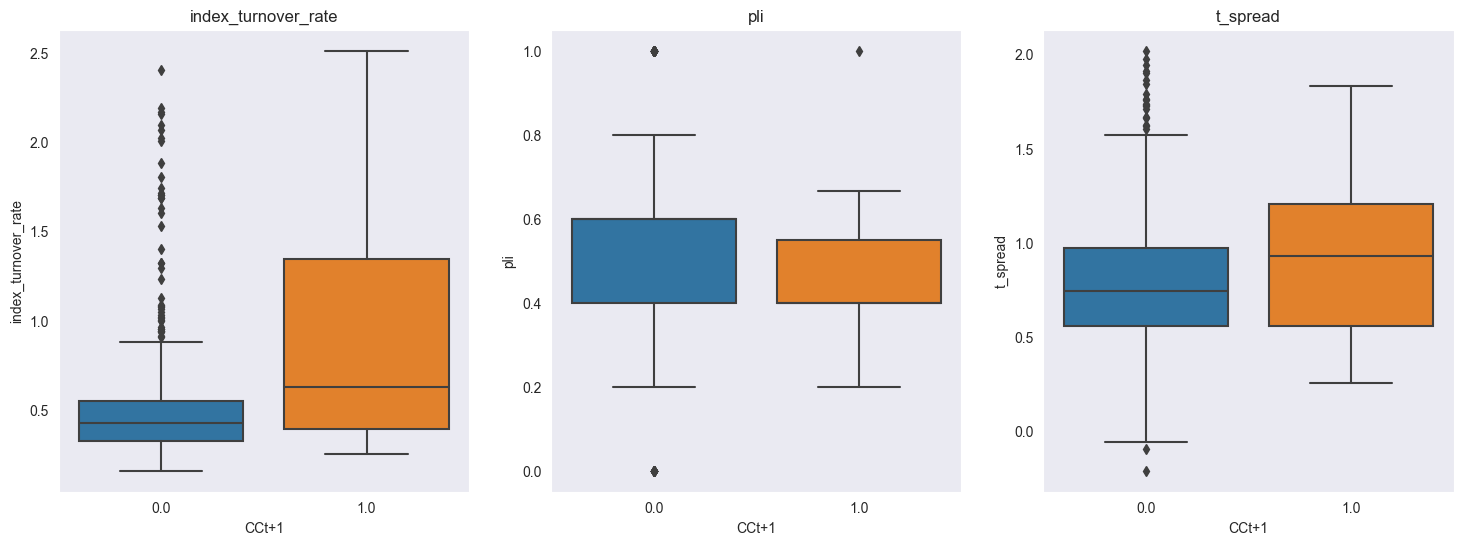

In [46]:
fig, axes = plt.subplots(1,3,figsize=(18,6)) 
check_cols = ["index_turnover_rate", "pli", "t_spread"]
for i in range(len(check_cols)):
    sns.boxplot(x='CCt+1', y= check_cols[i], data=df,ax=axes[i]).set(title=check_cols[i])

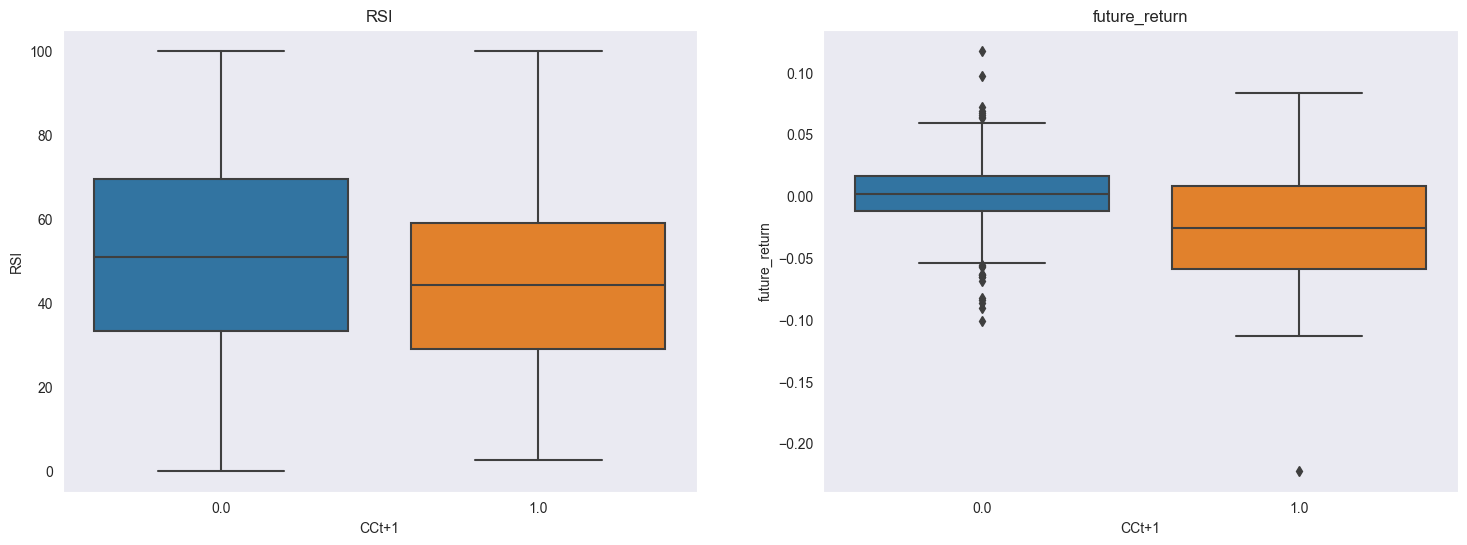

In [47]:
fig, axes = plt.subplots(1,2,figsize=(18,6)) 
check_cols = ["RSI", "future_return"]
for i in range(len(check_cols)):
    sns.boxplot(x='CCt+1', y= check_cols[i], data=df,ax=axes[i]).set(title=check_cols[i])

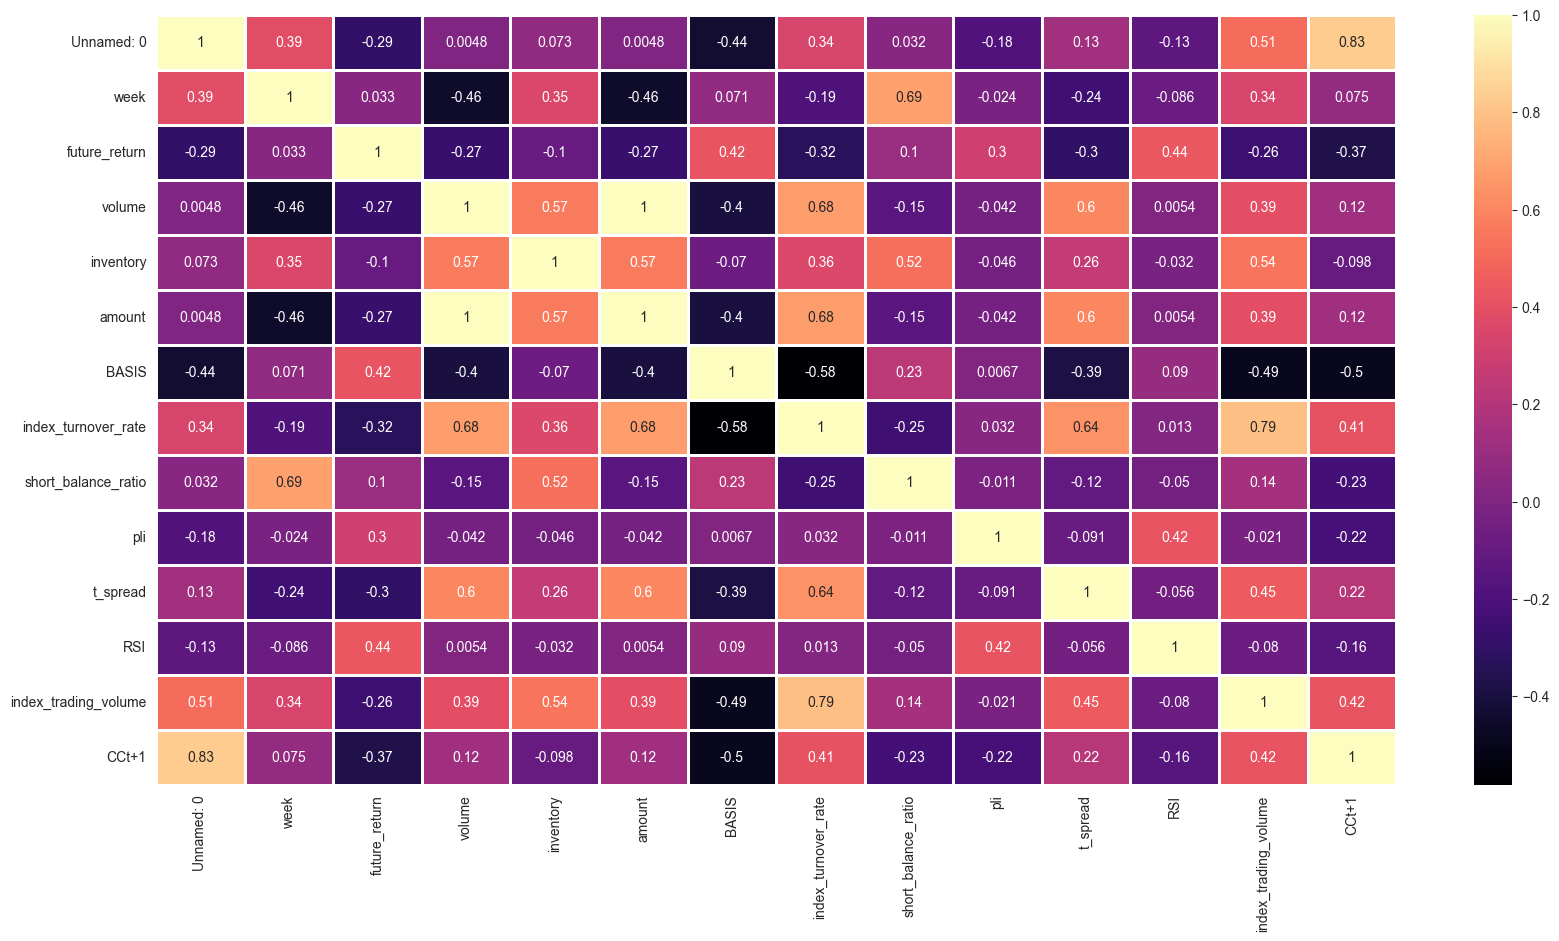

In [48]:
#read balanced dataset
df_balanced = pd.read_csv('balanced_df_weekly.csv')
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df_balanced.corr(), annot = True, linewidths = 2, cmap = "magma");